# Python Assignment_Edna Mageto

Install the necessary packages to work with


In [1]:
import pandas as pd
import seaborn as sns
import requests
import urllib
import io


In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Alphabet import SingleLetterAlphabet
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
from Bio.SeqUtils import molecular_weight
from Bio.Alphabet import IUPAC

# 1. 
### This function gets sequences 


In [3]:

def get_sequences_from_file(fasta_fn): # def is used to define a function get_sequence_data_from _file 
    #that takes a fasta file as an input file.
    sequence_data_dict = {} # Creates and defines an empty variable
    for record in SeqIO.parse(fasta_fn, "fasta"):# This is a for loop with SeqIO.parse() function used 
        #to read sequence files as seq record objects. For every fasta sequence, use built in biopython function
        description = record.description.split()# splitting the output from the in built function defined above 
        #and store it in the defined variable
        species_name = description[1] + " " + description[2]# define or create a variable species_names store the name, space and 
        #then followed by the sequences
        sequence_data_dict[species_name] = record.seq #In a dictionary, assign the previous created variable species_name
        #to the record.seq. This appends the empty variable with the sequences from previous step
    return(sequence_data_dict)# This step return a dictionary with species_name as key and sequences


In [4]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")#Reading in the data
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

# 2.
#### This function helps to translates a string of given nucleotides to amino acids

In [5]:
def function_translate(nucleotide):# fefines the function that changes the original DNA sequence into aa
    aa = ''
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  # creates j table for codon 
    for i in range(0,len(nucleotide),3): # for loop through every 3rd position
        j = nucleotide[i:i+3]
        if j in mito_table.stop_codons: # do nothing if there is stop codon
            pass
        else :
            aa = aa + mito_table.forward_table[j]   # add amino acid to codon called j
    return aa


In [6]:
Aptenodytes_forsteristr = str(cytb_seqs['Aptenodytes forsteri'])

In [7]:
function_translate(Aptenodytes_forsteristr)
                   

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [8]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]# testing what is going on

In [9]:
mito_table.start_codons#printing the start codons

['ATT', 'ATC', 'ATA', 'ATG', 'GTG']

In [10]:
mito_table.stop_codons#printing the stop codons

['TAA', 'TAG', 'AGA', 'AGG']

## 3 
#### Using alternative function to translate


In [11]:
#Use of available biopython libraries 
#This can be done by using the function translate function built in Biopython. 
#so to use the funtion,one has to load the allphabet "SingleLetterAlphabet" packageas this will help in
# to interpret the sequence 
#After loading the package,specify the type of table in this case table=2

def alt_translate_function(string_nucleotides): #This function reads a string of nucleotides
    aa_string = string_nucleotides.translate(table=2,to_stop=True) #This function returns translated amino acids 
    return (str(aa_string))

In [12]:
alt_translate_function(cytb_seqs['Aptenodytes forsteri'])#testing the function

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

# 4. 
#### Molecular weight of amino acids

In [13]:
def compute_molecular_weight(aa_seq): #Funtion takes a bulit in biopython sequence
    analysed_seq = ProteinAnalysis(aa_seq)
    weight = analysed_seq.molecular_weight()#Calculates the molecular weight of a protein
    return(weight)

In [14]:
compute_molecular_weight(Aptenodytes_forsteristr) #Testing the function

100706.248000002

# 5 
#### Analysis of the GC content function 


In [15]:
def GC_content(sequence):#Defines a funtion for the GC content calculation
    GC_count= 0
    for i in sequence:
        if i =='G' or i=='C':
            GC_count +=1
             
    return (float(GC_count)*100/(len(sequence)))
    

In [16]:
GC_content(cytb_seqs['Aptenodytes forsteri'])

48.38145231846019

# 6
### Main
#### Import necessary files

In [17]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [18]:
penguins_df =pd.read_csv("penguins_mass.csv")


In [19]:
penguins_df


,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [20]:
penguins_copy=penguins_df.copy()#creating a similar copy of the data

In [21]:
penguins_copy['molecular weight'] = 'NaN' # adding a column called molecular weight and assigning NaN values 

In [22]:
penguins_copy['GC_content'] = 'NaN' # adding a column called molecular weight and assigning NaN values 

In [23]:
penguins_copy

,species,mass,molecular weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [24]:
penguins_df_copy=penguins_copy.copy()# creating and storing a copy of this data the molecular 
#weight and GC content coulumns as NAN

In [25]:
penguins_df.head(3)

,species,mass
0,Aptenodytes forsteri,28.0
1,Aptenodytes patagonicus,13.4
2,Eudyptes chrysocome,2.8


In [26]:
penguins_copy.head(3)

,species,mass,molecular weight,GC_content
0,Aptenodytes forsteri,28.0,NaN,NaN
1,Aptenodytes patagonicus,13.4,NaN,NaN
2,Eudyptes chrysocome,2.8,NaN,NaN


# 7 
####  for-loop that translates each sequence
##### gets molecular weight and 
##### computes the GC content of each translated sequence and 
#### adds those data to DataFrame

# 8 
#### Plot a bar-chart of the mass with the x-axes labeled with species names.
#### *Q1* What is the smallest penguin species?  Eudyptula minor
#### *Q2* What else is interesting about this species? number 3 in mol weight


In [27]:
j = 0 # setting j at 0
for key,value in cytb_seqs.items(): #setting values for every speices in penguins_df
    translate_seq = function_translate(str(value)) #Translating the fasta sequences for each species into amino acids
    weight = compute_molecular_weight(translate_seq) # Computating molecular weight 
    GC_call=GC_content(str(value))
    penguins_copy.set_value(j,'GC_content',GC_call)
    penguins_copy.set_value(j,'molecular weight',weight)
    j=j+1
print(penguins_copy)



                    species   mass molecular weight GC_content
0      Aptenodytes forsteri  28.00          42459.6    48.3815
1   Aptenodytes patagonicus  13.40          42563.7    49.6938
2       Eudyptes chrysocome   2.80          42475.6    51.1811
3     Eudyptes chrysolophus   4.50          42445.5    50.9186
4         Eudyptes sclateri   4.25          42475.6    50.8311
5           Eudyptula minor   1.60          42491.6    49.2563
6        Pygoscelis adeliae   4.60          42458.6    49.0814
7     Pygoscelis antarctica   4.10          42404.5     47.769
8          Pygoscelis papua   6.10          42595.9    47.1566
9       Spheniscus demersus   3.20          42431.5     48.294
10     Spheniscus humboldti   4.75          42399.6    49.2563
11  Spheniscus magellanicus   3.40          42459.6    48.2065


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [29]:
%matplotlib inline

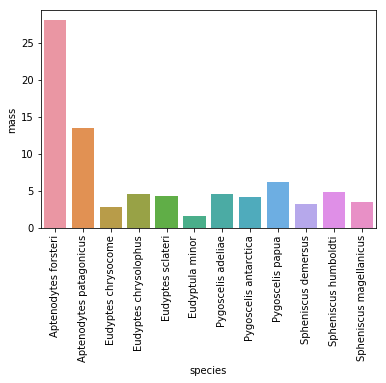

In [30]:
figure1 = sns.barplot(x = 'species', y= 'mass', hue_order='species', data = penguins_df)
figure1.set_xticklabels(labels = penguins_df.species, rotation=90,)

# 9 
#### Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

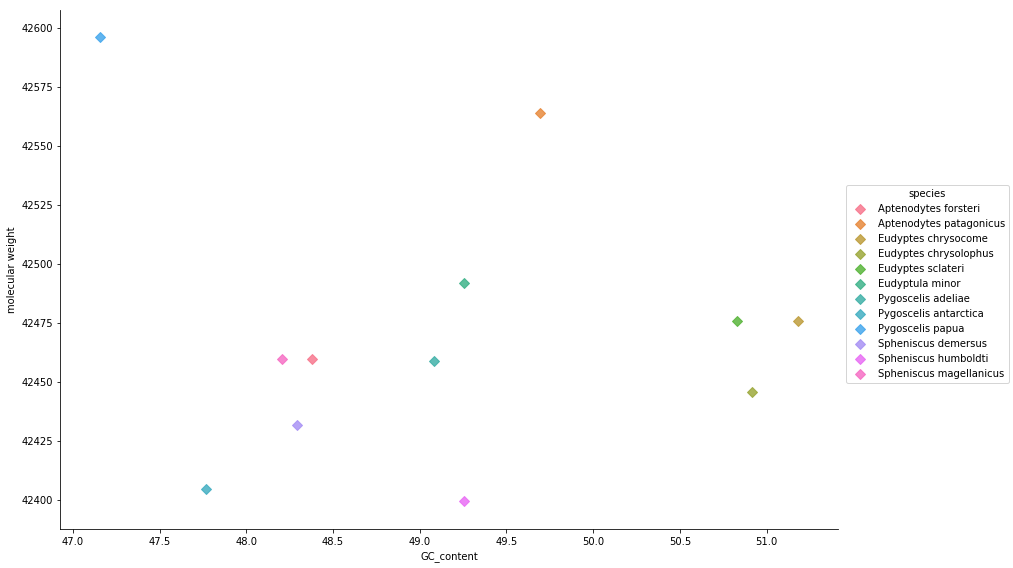

In [31]:
sns.lmplot("GC_content", "molecular weight", data=penguins_copy, fit_reg=False, size=8,aspect=1.5, scatter_kws={'alpha':0.8,"s": 50}, hue='species', markers='D')

# 10 
#### Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [32]:
penguins_df.to_csv('penguins_mass_cytb.csv', sep=',',index=False, encoding='utf-8', )

# Bonus

### The 20 amino acids can be classified as charged, polar or hydrophobic.
##### I am going to try this out using a function that can count number of aa based on if they are charged, polar or hydrophobic


In [36]:
def get_aa_propotion_role_function(aa_seq):
    charged = ['R','K','D','E'] #defines charged aa                      
    polar = ['Q','N','H','S','T','Y','C','M','W']# defines polar aa
    hydrophobic = ['A','I','L','F','V','P','G']# defines hydrophobic aa
    charged_aa = count_aa_seq(aa_seq , charged)# counting number of times charged aa occurs 
    hydrophobic_aa = count_aa_seq(aa_seq , hydrophobic)#counting number of times hydrophobic aa occurs 
    polar_aa = count_aa_seq(aa_seq , polar)#repeat for polar as in charged and hydrophobic
    seq_len = len( aa_seq)  # length for each aa seq.
    return {'propotion_charged': float(charged_aa)/seq_len,
           'proportion_hydrophobic': float (hydrophobic_aa)/seq_len,
           'propotion_polar': float(polar_aa)/seq_len}

def count_aa_seq(aa_seq, aa): # defines a function that will be able to use output from the function before
    counter = 0                                                        
    for i in aa:#for Loop that searches through types of aa and adds them up
        counter += aa_seq.count(i)
        return counter   #Returns the count of each type of aa  

## below, the for loop translates each sequence and the proportion of each aa type
## and adds those proportions to the dataframe

aa = 0
counter = 0
for key, value in cytb_seqs.items(): #gives respective values for every speices in penguins_copy
    aa_seq = function_translate(str(value))  #Translating the sequences for each species into aa
    count_aa = get_aa_propotion_role_function(aa_seq) #Counting aa for each type
    
#creating new colums for  each aa in the dataframe i.e proportions of each
    penguins_copy.set_value(counter,"charged",(count_aa["propotion_charged"])) 
    penguins_copy.set_value(counter,"polar",(count_aa["propotion_polar"]))             
    penguins_copy.set_value(counter,"hydrophobic",(count_aa["proportion_hydrophobic"]))       
    counter =counter+1
    
print(penguins_copy)  

                    species   mass molecular weight GC_content   charged  \
0      Aptenodytes forsteri  28.00          42459.6    48.3815  0.021053   
1   Aptenodytes patagonicus  13.40          42563.7    49.6938  0.021053   
2       Eudyptes chrysocome   2.80          42475.6    51.1811  0.021053   
3     Eudyptes chrysolophus   4.50          42445.5    50.9186  0.021053   
4         Eudyptes sclateri   4.25          42475.6    50.8311  0.021053   
5           Eudyptula minor   1.60          42491.6    49.2563  0.021053   
6        Pygoscelis adeliae   4.60          42458.6    49.0814  0.021053   
7     Pygoscelis antarctica   4.10          42404.5     47.769  0.021053   
8          Pygoscelis papua   6.10          42595.9    47.1566  0.021053   
9       Spheniscus demersus   3.20          42431.5     48.294  0.021053   
10     Spheniscus humboldti   4.75          42399.6    49.2563  0.021053   
11  Spheniscus magellanicus   3.40          42459.6    48.2065  0.021053   

       pola

# Plotting

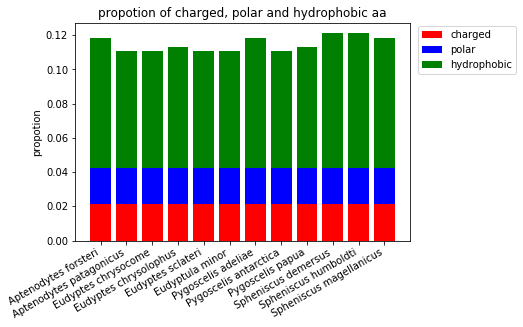

In [34]:
ind = np.arange(len(penguins_copy))    
p1 = plt.bar(ind, penguins_copy.charged, color='r')
p2 = plt.bar(ind, penguins_copy.polar, bottom = penguins_copy.charged, color='b')
p3 = plt.bar(ind, penguins_copy.hydrophobic,bottom=penguins_copy.charged+penguins_copy.polar, color='g')
plt.ylabel('propotion')
plt.title('propotion of charged, polar and hydrophobic aa')
plt.xticks(ind, penguins_copy.species, rotation = 30, horizontalalignment = 'right' )
plt.legend((p1[0], p2[0], p3[0]), ('charged', 'polar', 'hydrophobic'),bbox_to_anchor=(1.01, 1.01))
plt.show()
